In [373]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt
import pandas as pd
import control as ctl

In [374]:
# Constants
fv=0.3
c=-0.2
Q1=0.05 *10**-3 #m^3/s
A1=np.pi*((70*10**-3)**2-(12.5*10**-3)**2) #m^2
A2=np.pi*((18.535/2)*10**-3)**2*(fv+c)    #m^2
g=9.81 #m/s^2
hs=(1/(2*g))*(Q1/A2)**2
theta_delay=6.5 #s



# Reaction Curve method

### P-Controller

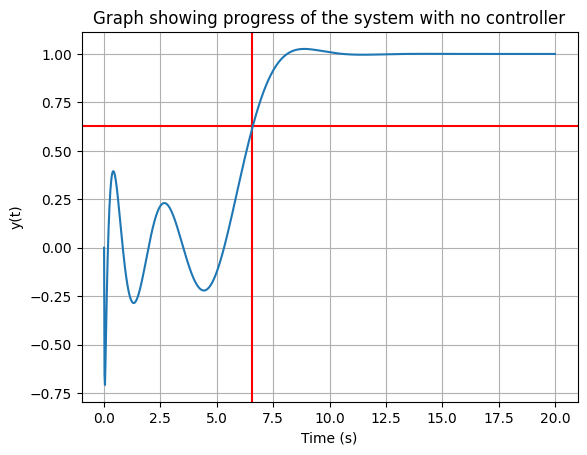

[0.014902930150466584, 0.00014283976507190046]


In [375]:
# Determining values from the graph for the controller for the flow rate
num=[1]
den=[A1,g*A2/(2*g*hs)**0.5]
trans=ctl.TransferFunction(num,den)
num_delay, den_delay=ctl.pade(theta_delay, 5)
trans_delay=ctl.TransferFunction(num_delay, den_delay)

feedback=ctl.feedback(trans)
t_val,step=ctl.step_response(trans_delay*feedback, T=np.linspace(0, 20, 1000))
plt.axhline(y=0.63, color='red')
plt.axvline(x=0.05+6.5, color='red')
plt.plot(t_val, step)
plt.xlabel('Time (s)')
plt.grid()
plt.ylabel('y(t)')
plt.title('Graph showing progress of the system with no controller')
plt.show()
print(den)

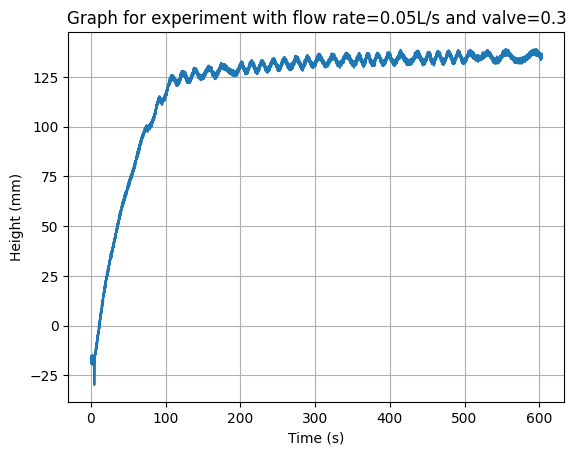

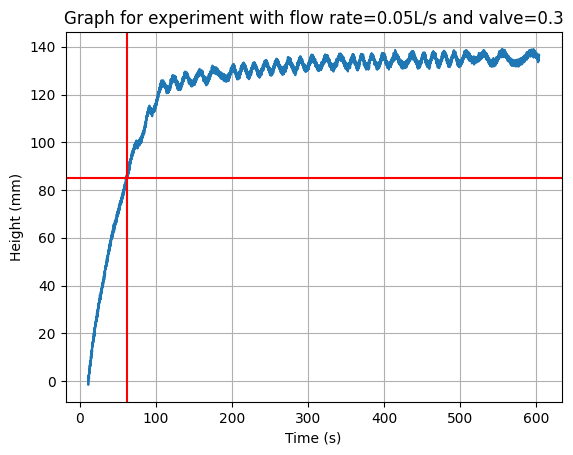

In [376]:
#flow experiment previously 0.5L/s- deadtime 6.5s
Flow_005_valve_03=pd.read_csv('Flow_0.05_valve_0.3.csv', delimiter=',', decimal='.')
Flow_005_valve_03.reset_index(drop=True, inplace=True)
Flow_005_valve_03['time']=Flow_005_valve_03['time']-Flow_005_valve_03['time'][0]

t=Flow_005_valve_03[['time']].values
y=Flow_005_valve_03['height'].values

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.05L/s and valve=0.3')
plt.grid()
plt.show()

y_average=np.average(y[3000:])
t_no_dead_time=t[111:]
height_no_dead_time=y[111:]

plt.plot(t_no_dead_time, height_no_dead_time)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.05L/s and valve=0.3')
plt.axhline(y=0.632*y_average, color='red')
plt.axvline(x=62.5, color='red')
plt.grid()
plt.show()

In [377]:
#K0 from experiment 0.5L/s
tau=62.5
Y0U0=y_average/(0.05*10**6)
K0_exp=Y0U0*(tau/6.5)
print(K0_exp) #s/mm

0.025866824956381103


In [378]:
# Constants 0.3L/s
fv=0.3
c=-0.21
Q1=0.03 *10**-3 #m^3/s
A1=np.pi*((70*10**-3)**2-(12.5*10**-3)**2) #m^2
A2a=np.pi*((18.535/2)*10**-3)**2*(fv+c)    #m^2
g=9.81 #m/s^2
hs=(1/(2*g))*(Q1/A2)**2
theta_delaya=10.3 #s
print(hs)

0.0630076645356405


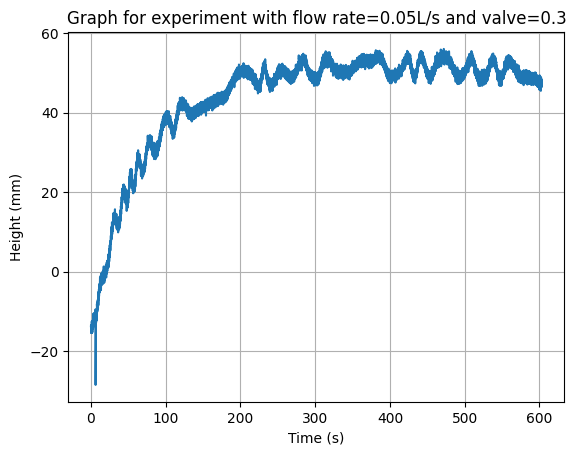

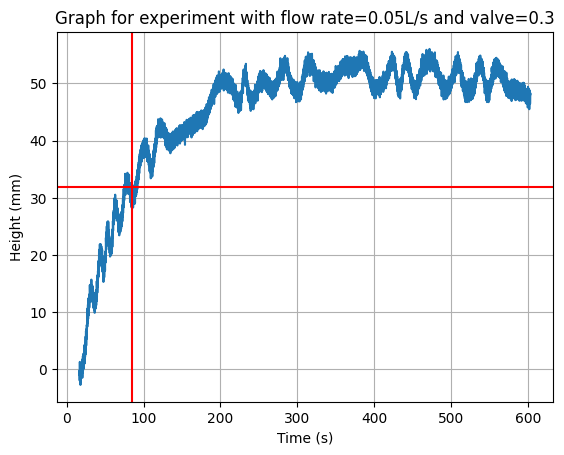

In [379]:

#flow experiment previously 0.3L/s- deadtime 10.3s
Flow_003_valve_03=pd.read_csv('flow_0.03_valve_0.3.csv', delimiter=',', decimal='.')
Flow_003_valve_03.reset_index(drop=True, inplace=True)
Flow_003_valve_03['time']=Flow_003_valve_03['time']-Flow_003_valve_03['time'][0]

t=Flow_003_valve_03[['time']].values
y=Flow_003_valve_03['height'].values

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.05L/s and valve=0.3')
plt.grid()
plt.show()

y_average=np.average(y[5000:])
t_no_dead_time=t[166:]
height_no_dead_time=y[166:]

plt.plot(t_no_dead_time, height_no_dead_time)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.05L/s and valve=0.3')
plt.axhline(y=0.632*y_average, color='red')
plt.axvline(x=85, color='red')
plt.grid()
plt.show()

In [380]:
#K0 from experiment 0.3L/s
tau1=85
Y0U0=y_average/(0.03*10**6)
K0_exp2=Y0U0*(tau1/10.3)
print(K0_exp2) #s/mm

0.013848931433141632


In [381]:
# Constants 0.8L/s
fv=0.3
c=-0.18
Q1=0.08 *10**-3 #m^3/s
A1=np.pi*((70*10**-3)**2-(12.5*10**-3)**2) #m^2
A2b=np.pi*((18.535/2)*10**-3)**2*(fv+c)    #m^2
g=9.81 #m/s^2
hs=(1/(2*g))*(Q1/A2)**2
theta_delayb=3.3 #s


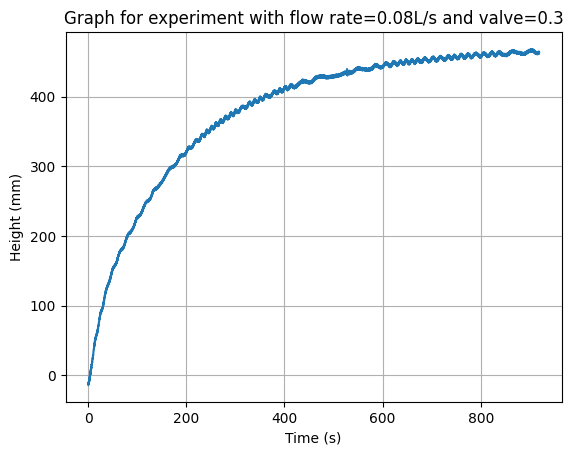

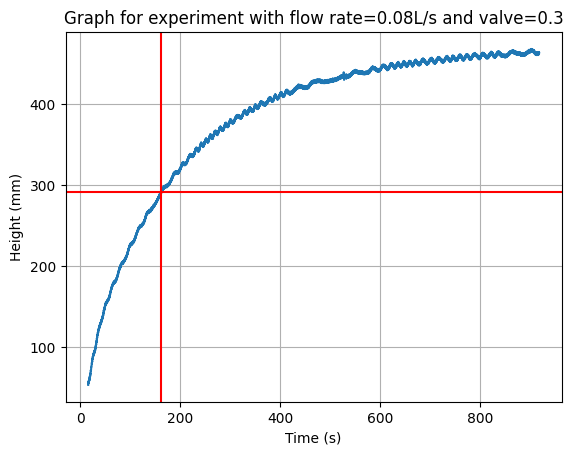

462.18952603658096


In [382]:

#flow experiment previously 0.8L/s- deadtime 3.3s
Flow_008_valve_03=pd.read_csv('Flow_0.08_valve_0.3_experiment.csv', delimiter=',', decimal='.')
Flow_008_valve_03.reset_index(drop=True, inplace=True)
Flow_008_valve_03['time']=Flow_008_valve_03['time']-Flow_008_valve_03['time'][0]

t=Flow_008_valve_03[['time']].values
y=Flow_008_valve_03['height'].values

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.08L/s and valve=0.3')
plt.grid()
plt.show()

y_average3=np.average(y[8000:])
t_no_dead_time=t[156:]
height_no_dead_time=y[156:]

plt.plot(t_no_dead_time, height_no_dead_time)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.08L/s and valve=0.3')
plt.axhline(y=0.632*y_average3, color='red')
plt.axvline(x=162, color='red')
plt.grid()
plt.show()
print(y_average3)

In [383]:
#K0 from experiment 0.8L/s

tau2=162
Y0U0=y_average3/(0.08*10**6)
K0_exp3=Y0U0*(tau2/3.3)
print(K0_exp3) #s/mm

0.28361630006790195


In [384]:
# Constants 0.7L/s
fv=0.3
c=-0.18
Q1=0.07 *10**-3 #m^3/s
A1=np.pi*((70*10**-3)**2-(12.5*10**-3)**2) #m^2
A2c=np.pi*((18.535/2)*10**-3)**2*(fv+c)    #m^2
g=9.81 #m/s^2
hs=(1/(2*g))*(Q1/A2)**2
theta_delayc=4 #s
print(hs)

0.3430417291384872


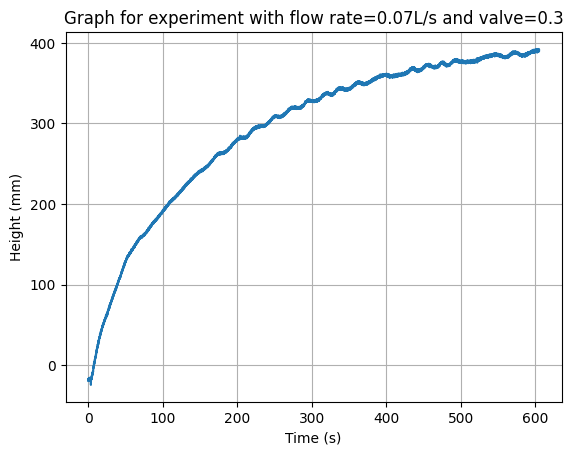

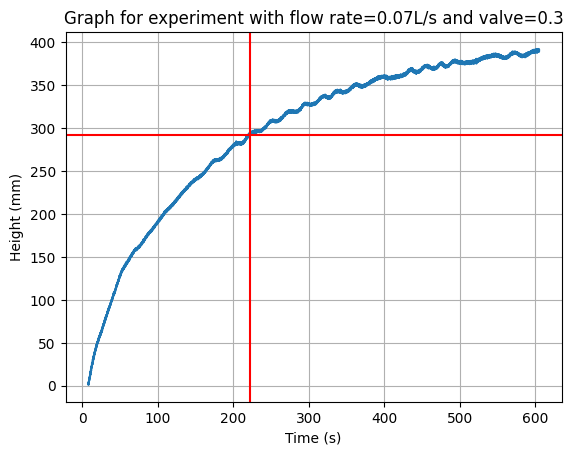

390.4877006241986


In [385]:

#flow experiment previously 0.3L/s- deadtime 3.3s
Flow_007_valve_03=pd.read_csv('Flow_0.07_valve_0.3.csv', delimiter=',', decimal='.')
Flow_007_valve_03.reset_index(drop=True, inplace=True)
Flow_007_valve_03['time']=Flow_007_valve_03['time']-Flow_007_valve_03['time'][0]

t=Flow_007_valve_03[['time']].values
y=Flow_007_valve_03['height'].values

plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.07L/s and valve=0.3')
plt.grid()
plt.show()

y_average4=np.average(y[6000:])
t_no_dead_time=t[77:]
height_no_dead_time=y[77:]

plt.plot(t_no_dead_time, height_no_dead_time)
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.title('Graph for experiment with flow rate=0.07L/s and valve=0.3')
plt.axhline(y=0.632*y_average3, color='red')
plt.axvline(x=222, color='red')
plt.grid()
plt.show()
print(y_average4)

In [386]:
#K0 from experiment 0.7L/s

tau3=222
Y0U0=y_average3/(0.07*10**6)
K0_exp4=Y0U0*(tau3/4)
print(K0_exp4) #s/mm

0.3664502670718606


In [387]:
#Averages (and final K0 values!): 

delayv=(theta_delay+theta_delaya+theta_delayb+theta_delayc)/4
K0_av=(K0_exp+K0_exp2+K0_exp3+K0_exp4)/4
tauav=(tau+tau1+tau2+tau3)/4
print(K0_av, delayv, tauav)

0.17244558088232131 6.025 132.875


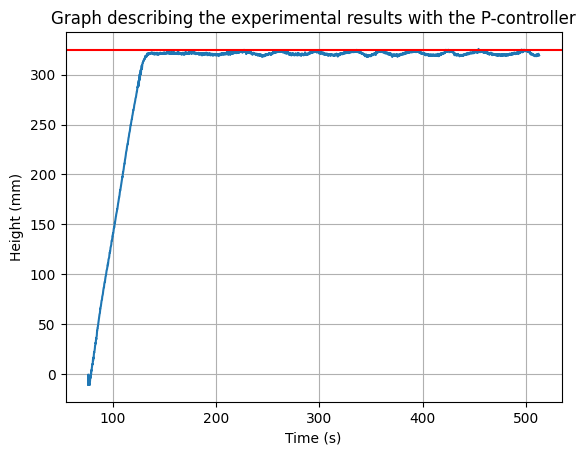

In [388]:
#P-controller experimental results- flow rate only (first try)- old K (do not use in report!)

p_controller_results=pd.read_csv('P-controller_valve0.csv', delimiter=',', decimal='.')
height_P=p_controller_results['height'].values
time=p_controller_results['time']
plt.plot(time,height_P)
plt.axhline(y=325, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Height (mm)')
plt.grid()
plt.title('Graph describing the experimental results with the P-controller')
plt.show()

In [389]:
# Constants- 0.5L/s samples :)
fv=0.3
c=-0.2
Q1=0.05 *10**-3 #m^3/s
A1=np.pi*((70*10**-3)**2-(12.5*10**-3)**2) #m^2
A2=np.pi*((20.11/2)*10**-3)**2*(fv+c)    #m^2
g=9.81 #m/s^2
hs=(1/(2*g))*(Q1/A2)**2
theta_delay=6.5 #s


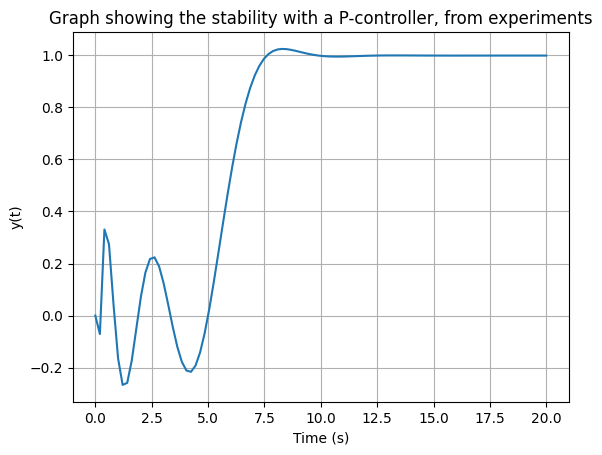

In [390]:
#K0 from experiment 0.5 L/s

num=[1]
den=[A1,g*A2/(2*g*hs)**0.5]
trans=ctl.TransferFunction(num,den)

num_delay, den_delay=ctl.pade(delayv, 5)
trans_delay=ctl.TransferFunction(num_delay, den_delay)

feedback=ctl.feedback(K0_av*trans)
t_val,step=ctl.step_response(trans_delay*feedback, T=np.linspace(0, 20, 100))
plt.plot(t_val, step)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Graph showing the stability with a P-controller, from experiments')
plt.grid()
plt.show()


## PI-controller

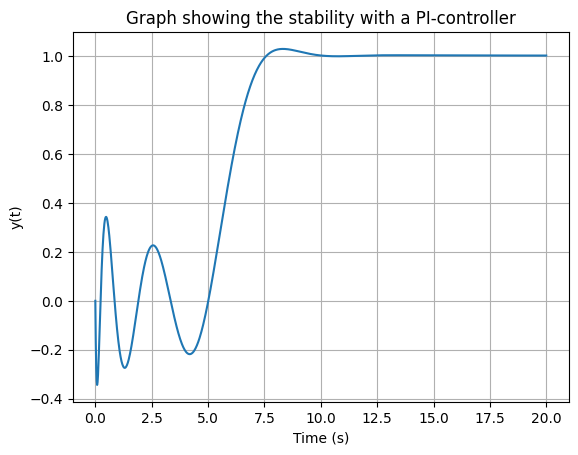

0.15520102279408918 19.8825


In [391]:
#PI controller values with K0_av
Kc=0.9*K0_av
tau1=3.3*delayv

num_PI=[Kc*tau1,Kc]
den_PI=[tau1,0]
trans_PI=ctl.TransferFunction(num_PI,den_PI)

num=[1]
den=[A1,g*A2/(2*g*hs)**0.5]
trans=ctl.TransferFunction(num,den)

feedback_PI=ctl.feedback(trans_PI*trans)
t_val_step,y_PI=ctl.step_response(trans_delay*feedback_PI, T=np.linspace(0,20,1000))
plt.plot(t_val_step, y_PI)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Graph showing the stability with a PI-controller')
plt.grid()
plt.show()
print(Kc, tau1)

# IMC controller

### PI-Controller

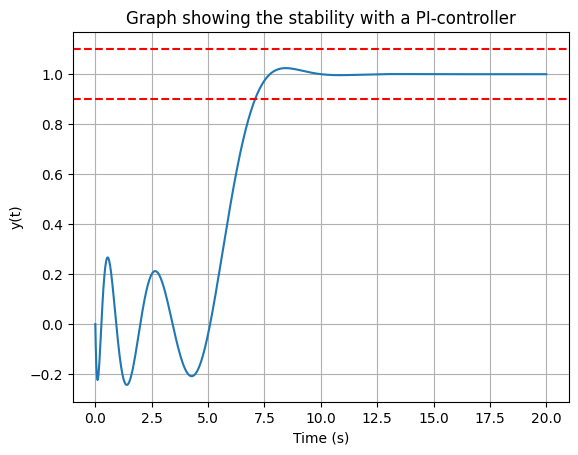

135.8875


In [392]:
#model Kc
kc1=(1/K0_av)*(2*tauav+delayv)/(2*10000)
tau=tauav+delayv/2


num_PI=[kc1*tau,kc1]
den_PI=[tau,0]
trans_PI1=ctl.TransferFunction(num_PI,den_PI)

num=[1]
den=[A1,g*A2/(2*g*hs)**0.5]
trans=ctl.TransferFunction(num,den)

feedback_PI=ctl.feedback(trans_PI1*trans)
t_val_step,y_PI=ctl.step_response(trans_delay*feedback_PI, T=np.linspace(0,20,1000))
plt.plot(t_val_step, y_PI)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Graph showing the stability with a PI-controller')
plt.axhline(y=1.1, color='red', linestyle='--')
plt.axhline(y=0.9, color='red', linestyle='--')

plt.grid()
plt.show()
print(tau)